# **1. 붓꽃 데이터 분석**

## **1.1 붓꽃 데이터 읽어와서 확인하기**

In [1]:
# 데이터 파일 읽어오기

import pandas as pd

df = pd.read_csv('iris.csv')   ## 시본으로 불러오는 방법도 있음?
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [2]:
# 데이터의 기본 정보 출력
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
# 데이터의 기초 통계량 출력

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# 품종별 개수 구하기

df['species'].value_counts()

## df.species.value_counts()로도 가능

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## **1.2 붓꽃 데이터 전처리**

In [6]:
# 결측치 확인하기

df.isna()

## df.isnull().sum(), 컬럼별 결측치 확인

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [7]:
# 칼럼별 결측치 확인
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
# 중복 데이터 확인하기

df[df.duplicated()]

## df[df.duplicated]
# 항상 데이터프레임을 보니까, 데이터 프레임에 넣어라

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


In [10]:
# 중복 데이터 모두 확인하기?

df[df.duplicated(keep=False)]

## idx = (df['sepal_length]==5.8) & (df['petal_width']==1.9)
## df.loc[idx, :]

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


In [38]:
# 중복 데이터 삭제하기

df2 = df.drop_duplicates()

In [39]:
df2.info()

## 중복 하나 제거해서 149행 됨

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


## **1.3 붓꽃 데이터 그룹핑**

In [12]:
# 품종(species) 열을 기준으로 합계 구하기

df2.groupby('species').sum()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,323.6,146.0,272.5,99.4


In [13]:
# 품종(species) 열을 기준으로 평균 구하기

df2.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006000,3.428000,1.462000,0.246000
versicolor,5.936000,2.770000,4.260000,1.326000
virginica,6.604082,2.979592,5.561224,2.028571


from matplotlib import pyplot as plt
_df_0['sepal_length'].plot(kind='hist', bins=20, title='sepal_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sepal_width'].plot(kind='hist', bins=20, title='sepal_width')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['petal_length'].plot(kind='hist', bins=20, title='petal_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['petal_width'].plot(kind='hist', bins=20, title='petal_width')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='sepal_length', y='sepal_width', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='sepal_width', y='petal_length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='petal_length', y='petal_width', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['sepal_length']
  ys = series['sepal_width']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('sepal_length', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sepal_length')
_ = plt.ylabel('sepal_width')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['sepal_length']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'sepal_length'}, axis=1)
              .sort_values('sepal_length', ascending=True))
  xs = counted['sepal_length']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('sepal_length', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sepal_length')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['petal_length']
  ys = series['sepal_width']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('petal_length', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('petal_length')
_ = plt.ylabel('sepal_width')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['petal_length']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'petal_length'}, axis=1)
              .sort_values('petal_length', ascending=True))
  xs = counted['petal_length']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('petal_length', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('petal_length')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['sepal_length'].plot(kind='line', figsize=(8, 4), title='sepal_length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['sepal_width'].plot(kind='line', figsize=(8, 4), title='sepal_width')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['petal_length'].plot(kind='line', figsize=(8, 4), title='petal_length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['petal_width'].plot(kind='line', figsize=(8, 4), title='petal_width')
plt.gca().spines[['top', 'right']].set_visible(False)

## **1.4 붓꽃 데이터 시각화**

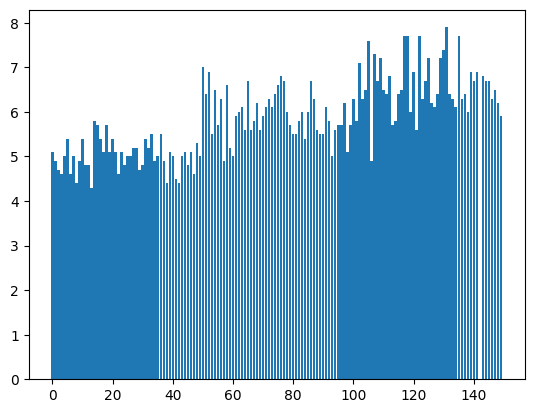

In [20]:
# 1. 막대 그래프 그리기 - 꽃받침 길이의 시각화
import matplotlib.pyplot as plt

sepal_length_data = df2['sepal_length']

plt.bar(sepal_length_data.index, sepal_length_data)

plt.show()

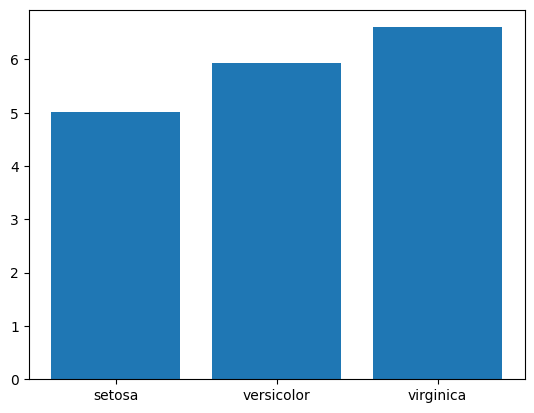

In [34]:
# 1. 막대 그래프 그리기 - 붓꽃 종류별 꽃받침 길이의 평균에 대한 시각화

# 붓꽃 종류별 꽃받침 길이의 평균 - df2.groupby('species')['sepal_length'].mean()

species_sepal_length = df2.groupby('species')['sepal_length'].mean()
plt.bar(species_sepal_length.index, species_sepal_length)

plt.show()

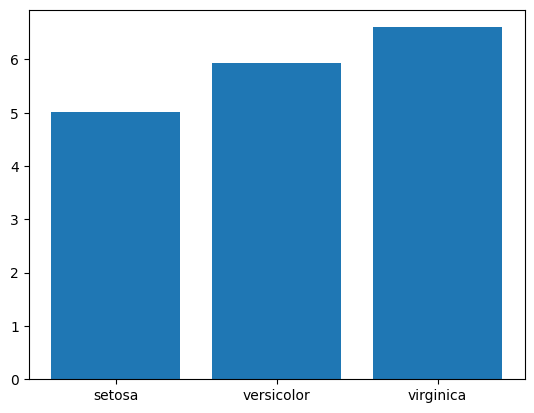

In [32]:
import matplotlib.pyplot as plt

# 1. 막대 그래프 그리기 - 붓꽃 종류별 꽃받침 길이의 평균에 대한 시각화
# 코랩 도움

species_names = df2.groupby('species')['sepal_length'].mean().index
sepal_length_means = df2.groupby('species')['sepal_length'].mean().values

plt.bar(species_names, sepal_length_means)

plt.show()

In [ ]:
#2. 히스토그램 그래프 그리기 - 해보기
import matplotlib.pyplot as plt

plt.hist(x, bins=4, )

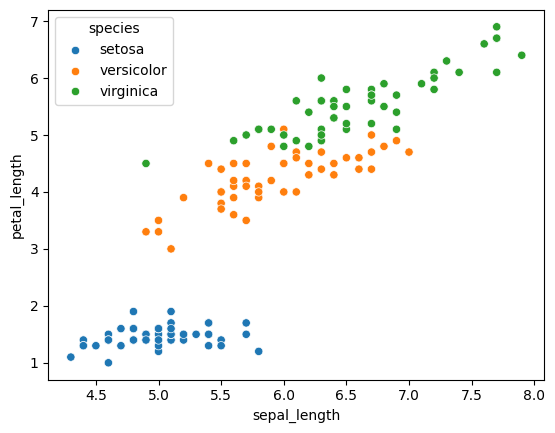

In [37]:
#3. 산점도 그래프 그리기

import seaborn as sns

iris_data = pd.read_csv('iris.csv')

sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris_data)
# hue로 범주 구분
plt.show()

# **+) 붓꽃 데이터 시각화 - 교수님 코딩**

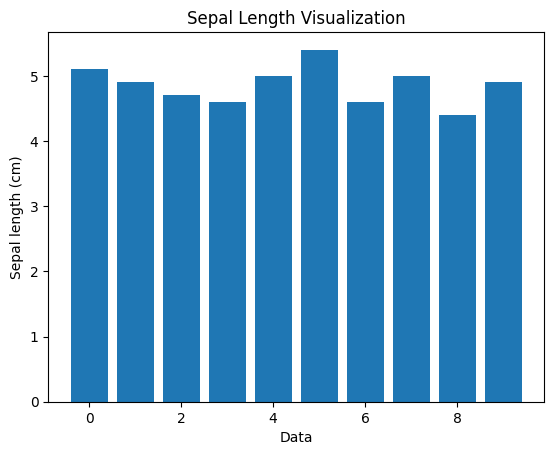

In [40]:
#1. 막대 그래프

plt.bar(df.index[:10], df.sepal_length[:10])  # 너무 많아서 몇 개만
plt.title('Sepal Length Visualization')
plt.xlabel('Data')
plt.ylabel('Sepal length (cm)')

plt.show()

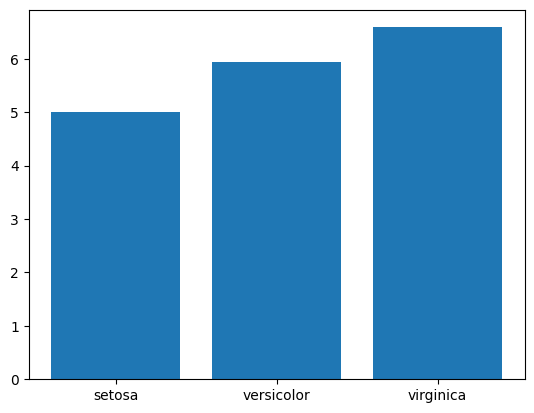

In [41]:
#2. 품종별 막대그래프

df2=df.groupby('species').mean()
plt.bar(df2.index, df2['sepal_length'])
plt.title('Sepal Length Visualization')
plt.xlabel('Data')
plt.ylabel('Sepal length (cm)')


plt.show()

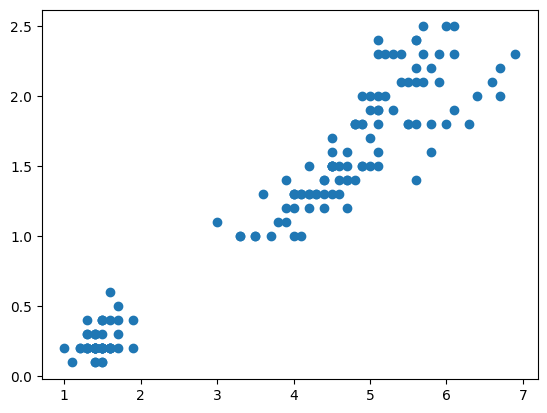

In [42]:
# 3. 산점도 그래프

plt.scatter(x= df['petal_length'], y = df['petal_width'])

plt.show()